In [18]:
import xarray as xr
import metview as mv
import pystac_client
import itertools
import time
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

xr.set_options(keep_attrs=True)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/envs/geospatial/share/proj failed


In [2]:
service = pystac_client.Client.open('https://data.inpe.br/bdc/stac/v1/')
service


<Client id=INPE>

In [3]:
for collection in service.get_collections():
    print(collection)

<CollectionClient id=S2-16D-2>
<CollectionClient id=mosaic-cbers4a-paraiba-3m-1>
<CollectionClient id=LCC_L8_30_16D_STK_Cerrado-1>
<CollectionClient id=mosaic-landsat-sp-6m-1>
<CollectionClient id=mosaic-s2-paraiba-3m-1>
<CollectionClient id=LCC_L8_30_16D_STK_MataAtlantica-1>
<CollectionClient id=mosaic-s2-yanomami_territory-6m-1>
<CollectionClient id=LCC_L8_30_16D_STK_Pantanal-1>
<CollectionClient id=LCC_L8_30_1M_STK_Cerrado-1>
<CollectionClient id=mosaic-landsat-amazon-3m-1>
<CollectionClient id=LCC_C4_64_1M_STK_GO_PA-SPC-AC-NA-1>
<CollectionClient id=mosaic-landsat-brazil-6m-1>
<CollectionClient id=mod13q1-6.1>
<CollectionClient id=mosaic-s2-amazon-3m-1>
<CollectionClient id=CB4-PAN10M-L2-DN-1>
<CollectionClient id=charter-wfi-1>
<CollectionClient id=CBERS4-MUX-2M-1>
<CollectionClient id=mosaic-s2-cerrado-4m-1>
<CollectionClient id=mosaic-cbers4-brazil-3m-1>
<CollectionClient id=landsat-2>
<CollectionClient id=mod11a2-6.1>
<CollectionClient id=CB4-PAN5M-L2-DN-1>
<CollectionClient id

In [4]:
collection = service.get_collection('prec_merge_daily-1')
collection

<CollectionClient id=prec_merge_daily-1>

In [5]:
for item in itertools.islice(collection.get_items(), 10):
    print(f"{item.id}")

prec_merge_daily_20250131
prec_merge_daily_20250130
prec_merge_daily_20250129
prec_merge_daily_20250128
prec_merge_daily_20250127
prec_merge_daily_20250126
prec_merge_daily_20250125
prec_merge_daily_20250124
prec_merge_daily_20250123
prec_merge_daily_20250122


In [6]:
item

<Item id=prec_merge_daily_20250122>

In [7]:
item.assets

{'ctl': <Asset href=https://data.inpe.br/bdc/data/MERGE/GPM/DAILY/2025/01/MERGE_CPTEC_20250122.ctl>,
 'idx': <Asset href=https://data.inpe.br/bdc/data/MERGE/GPM/DAILY/2025/01/MERGE_CPTEC_20250122.idx>,
 'thumbnail': <Asset href=https://data.inpe.br/bdc/data/MERGE/FIG/DAILY/2025/01/MERGE_DAILY_20250122.png>,
 'merge_daily': <Asset href=https://data.inpe.br/bdc/data/MERGE/GPM/DAILY/2025/01/MERGE_CPTEC_20250122.grib2>}

In [8]:
url = item.assets['merge_daily'].href
url

'https://data.inpe.br/bdc/data/MERGE/GPM/DAILY/2025/01/MERGE_CPTEC_20250122.grib2'

In [9]:
item_search = service.search(datetime='2025-01-01/2025-01-31',
                             collections=['prec_merge_daily-1'])
ds = mv.Fieldset()
for i in item_search.items():
    url = i.assets['merge_daily'].href
    time.sleep(0.1)
    print(url)
    ds.append(mv.download (url=url, target='./Dados/tmp'))

print (i.assets['ctl'].href)

https://data.inpe.br/bdc/data/MERGE/GPM/DAILY/2025/01/MERGE_CPTEC_20250131.grib2
https://data.inpe.br/bdc/data/MERGE/GPM/DAILY/2025/01/MERGE_CPTEC_20250130.grib2
https://data.inpe.br/bdc/data/MERGE/GPM/DAILY/2025/01/MERGE_CPTEC_20250129.grib2
https://data.inpe.br/bdc/data/MERGE/GPM/DAILY/2025/01/MERGE_CPTEC_20250128.grib2
https://data.inpe.br/bdc/data/MERGE/GPM/DAILY/2025/01/MERGE_CPTEC_20250127.grib2
https://data.inpe.br/bdc/data/MERGE/GPM/DAILY/2025/01/MERGE_CPTEC_20250126.grib2
https://data.inpe.br/bdc/data/MERGE/GPM/DAILY/2025/01/MERGE_CPTEC_20250125.grib2
https://data.inpe.br/bdc/data/MERGE/GPM/DAILY/2025/01/MERGE_CPTEC_20250124.grib2
https://data.inpe.br/bdc/data/MERGE/GPM/DAILY/2025/01/MERGE_CPTEC_20250123.grib2
https://data.inpe.br/bdc/data/MERGE/GPM/DAILY/2025/01/MERGE_CPTEC_20250122.grib2
https://data.inpe.br/bdc/data/MERGE/GPM/DAILY/2025/01/MERGE_CPTEC_20250121.grib2
https://data.inpe.br/bdc/data/MERGE/GPM/DAILY/2025/01/MERGE_CPTEC_20250120.grib2
https://data.inpe.br/bdc/dat

In [10]:
ds.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
prec,surface,2550,"20250101,20250102,...",1200,0,None,260138,None,None,None,None
prmsl,surface,2550,"20250101,20250102,...",1200,0,None,260074,None,None,None,None


In [11]:
area = [-60,-120,20,0] # S,W,N,E
AMS = mv.geoview(
    map_area_definition = "corners",
    area                = area,
    coastlines = mv.mcoast(
        map_coastline_land_shade        = "on",
        map_coastline_land_shade_colour = "#eeeeee",
        map_grid_latitude_increment     = 10,
        map_grid_longitude_increment    = 10)
    )

auto_style = mv.mcont(contour_automatic_setting = "ecmwf")


In [12]:
shaded = mv.mcont(
    legend                       = "on",
    contour_highlight            = "off",
    contour_level_selection_type = "level_list",
    contour_level_list           = [2.5, 5, 10, 15, 35, 50, 75, 100, 125, 150, 200, 300],
    contour_label                = "off",
    contour_shade                = "on",
    contour_shade_method         = "area_fill",
    contour_line_colour_rainbow_direction = "clockwise",
    contour_line_colour_rainbow  = "on"
#    contour_shade_colour_list    = ["sky","greenish_blue","avocado",
#                                    "orange","orangish_red","violet", "RGB(1,0,0)"]
    )

In [13]:
#ds = ds.to_dataset()
#ds
mv.plot(AMS, ds['prec'], shaded)

Image(value=b'', layout="Layout(visibility='hidden')")

Label(value='Generating plots....')

In [14]:
#xds = mv.to_dataset(ds)


In [15]:
## lats, lons = mv.latitudes(ds['prec']).reshape(31, 1001, 924), mv.longitudes(ds['prec']).reshape(31, 1001, 924)
merge_array = mv.values(ds['prec']).reshape(31, 924, 1001)
lats, lons = mv.latitudes(ds['prec']).reshape(31, 924, 1001), mv.longitudes(ds['prec']).reshape(31, 924, 1001)
times=mv.valid_date(ds['prec'])

print (lats.shape, lons.shape, merge_array.shape, np.size(times))


(31, 924, 1001) (31, 924, 1001) (31, 924, 1001) 31


In [16]:
#xds = ds['prec'].to_dataset()


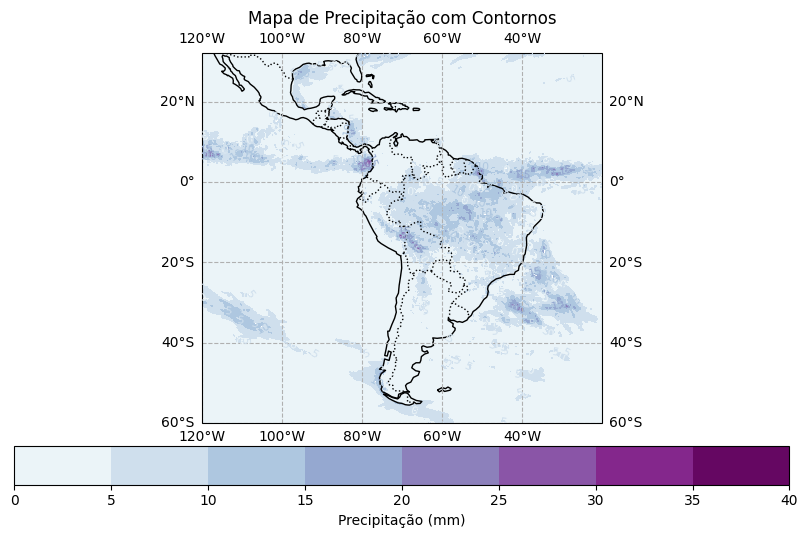

In [20]:
# Definir níveis de contorno personalizados
levels = [2.5, 5, 10, 12.5, 15, 20, 25, 30, 50]

# Criar a figura e os eixos com projeção de mapa
fig, ax = plt.subplots(
    figsize=(10, 6),
    subplot_kw={"projection": ccrs.PlateCarree()}  # Projeção geográfica
)

# Plotar os dados de precipitação (preenchimento)
contourf = ax.contourf(lons[0], lats[0], merge_array.mean(axis=0), 
#                      levels=levels, 
                      cmap='BuPu', 
                      transform=ccrs.PlateCarree())

# Adicionar rótulos aos contornos
ax.clabel(contourf, #levels=levels, 
         inline=True, 
         fontsize=8, 
         fmt='%1.0f')

# Adicionar barra de cores
cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label('Precipitação (mm)')

# Adicionar elementos do mapa
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, linestyle='--')

# Definir título
ax.set_title('Mapa de Precipitação com Contornos')

plt.show()

In [22]:
xds = xr.Dataset(
    data_vars={
        "prec": (("time", "lat", "lon"), merge_array),
    },
    coords={
        "time": times[:31],
        "lat": (("y", "x"), lats[0]),
        "lon": (("y", "x"), lons[0]),
    }
)

In [23]:
xds

<xarray.Dataset> Size: 244MB
Dimensions:  (time: 31, lat: 924, lon: 1001, y: 924, x: 1001)
Coordinates:
  * time     (time) datetime64[ns] 248B 2025-01-31T12:00:00 ... 2025-01-01T12...
    lat      (y, x) float64 7MB -60.05 -60.05 -60.05 ... 32.25 32.25 32.25
    lon      (y, x) float64 7MB 239.9 240.0 240.1 240.2 ... 339.8 339.9 340.0
Dimensions without coordinates: y, x
Data variables:
    prec     (time, lat, lon) float64 229MB 1.125 0.625 0.5 ... 0.0 0.125 0.125

In [24]:
xds.prec.head()


<xarray.DataArray 'prec' (time: 5, lat: 5, lon: 5)> Size: 1kB
array([[[ 1.125 ,  0.625 ,  0.5   ,  0.625 ,  0.75  ],
        [ 0.875 ,  0.75  ,  0.75  ,  0.5   ,  0.625 ],
        [ 0.875 ,  0.75  ,  0.75  ,  0.5   ,  0.625 ],
        [ 1.    ,  0.875 ,  0.875 ,  0.75  ,  0.75  ],
        [ 1.    ,  1.    ,  0.875 ,  0.625 ,  0.625 ]],

       [[ 5.25  ,  8.875 ,  8.25  ,  7.375 ,  8.    ],
        [ 9.25  ,  8.75  ,  7.875 ,  7.5   ,  8.    ],
        [ 8.75  ,  7.875 ,  7.5   ,  7.75  ,  7.25  ],
        [ 8.875 ,  8.875 ,  8.5   ,  7.625 ,  7.875 ],
        [ 8.625 ,  9.25  ,  8.375 ,  7.875 ,  7.875 ]],

       [[ 0.    ,  9.    ,  6.    ,  7.3125,  6.625 ],
        [ 6.    ,  9.375 , 10.5625,  7.875 ,  7.75  ],
        [ 9.375 , 10.8125,  9.125 ,  8.125 ,  9.625 ],
        [ 9.0625,  8.5625,  8.875 ,  9.3125,  9.875 ],
        [10.5   ,  8.8125,  9.    ,  8.875 ,  8.    ]],

       [[ 0.5   ,  0.625 ,  0.875 ,  1.375 ,  1.375 ],
        [ 0.5   ,  0.625 ,  0.75  ,  1.125 ,  1.375 ],
        [ 0.875 ,  0.625 ,  0.625 ,  1.25  ,  1.5   ],
        [ 1.125 ,  0.625 ,  0.625 ,  0.75  ,  1.25  ],
        [ 0.75  ,  0.75  ,  0.875 ,  1.125 ,  1.25  ]],

       [[ 2.1875,  1.75  ,  1.875 ,  1.3125,  0.9375],
        [ 1.1875,  2.25  ,  1.8125,  2.8125,  1.6875],
        [ 1.875 ,  1.6875,  1.875 ,  1.8125,  2.5625],
        [ 2.375 ,  2.3125,  2.375 ,  2.5   ,  2.375 ],
        [ 2.4375,  2.625 ,  2.3125,  2.75  ,  2.5625]]])
Coordinates:
  * time     (time) datetime64[ns] 40B 2025-01-31T12:00:00 ... 2025-01-27T12:...
Dimensions without coordinates: lat, lon

(array([2.8262323e+07, 3.2035100e+05, 6.1549000e+04, 1.8553000e+04,
        6.1920000e+03, 2.1700000e+03, 9.1400000e+02, 4.4700000e+02,
        1.1200000e+02, 3.3000000e+01]),
 array([  0. ,  33.5,  67. , 100.5, 134. , 167.5, 201. , 234.5, 268. ,
        301.5, 335. ]),
 <BarContainer object of 10 artists>)

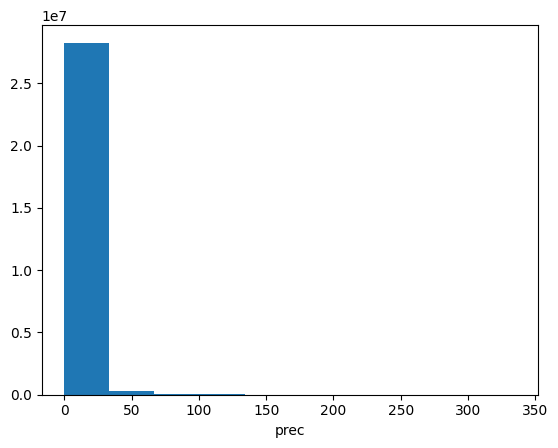

In [25]:
xds.prec.plot()

In [31]:
xds.prec[0].shape


(924, 1001)

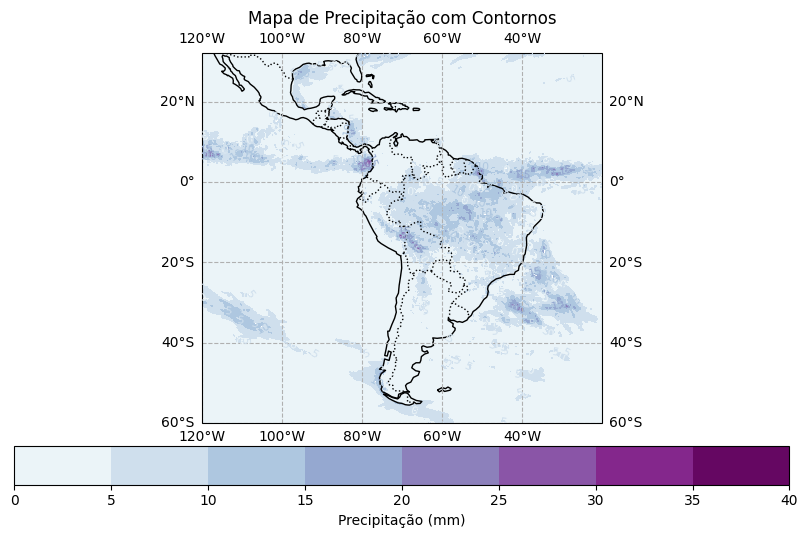

In [43]:
# Supondo que você já tenha um dataset xarray chamado `ds`
# Exemplo de extração de dados
p = xds['prec']  # Variável de precipitação
y = xds['lat']    # Coordenadas de latitude
x = xds['lon']    # Coordenadas de longitude

# Criar a figura e os eixos com projeção de mapa
fig, ax = plt.subplots(
    figsize=(10, 6),
    subplot_kw={"projection": ccrs.PlateCarree()}  # Projeção geográfica
)

# Plotar os dados de precipitação (preenchimento)
contourf = ax.contourf(x, y, p.mean(axis=0), 
                      cmap='BuPu', 
                      transform=ccrs.PlateCarree())

# Adicionar rótulos aos contornos
ax.clabel(contourf, #levels=levels, 
         inline=True, 
         fontsize=8, 
         fmt='%1.0f')

# Adicionar barra de cores
cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label('Precipitação (mm)')

# Adicionar elementos do mapa
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, linestyle='--')

# Definir título
ax.set_title('Mapa de Precipitação com Contornos')

plt.show()